**CROP RECOMENDATIONS MODEL PERFORMANCES**

===== PART 1: Crop Classification =====
Dataset columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label', 'state']
ExtraTrees: Acc=0.9873, Precision=0.9871, Recall=0.9872, F1=0.9870
LogisticRegression: Acc=0.9673, Precision=0.9671, Recall=0.9672, F1=0.9670
DecisionTree: Acc=0.9879, Precision=0.9878, Recall=0.9877, F1=0.9878
RandomForest: Acc=0.9927, Precision=0.9925, Recall=0.9927, F1=0.9926
KNN: Acc=0.9661, Precision=0.9654, Recall=0.9654, F1=0.9650
GaussianNB: Acc=0.9794, Precision=0.9793, Recall=0.9791, F1=0.9790
SVM: Acc=0.9794, Precision=0.9792, Recall=0.9792, F1=0.9789


<Figure size 1200x600 with 0 Axes>

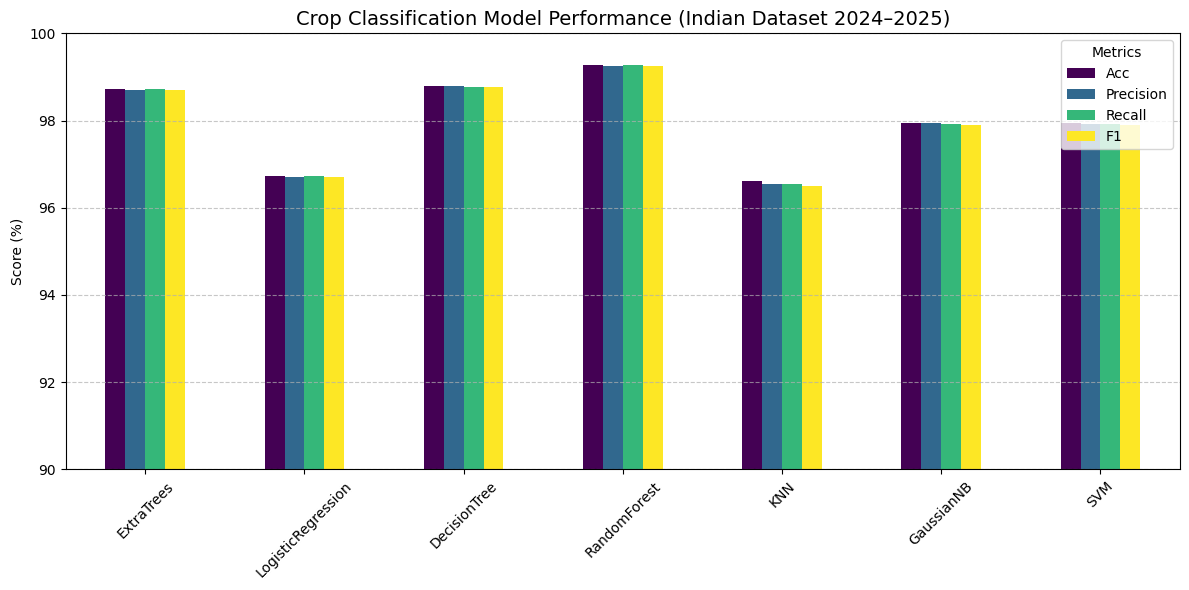

In [ ]:
# ======================================================
# Crop Classification (Indian Dataset 2024–2025)
# ======================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Classification models
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# ==============================
# PART 1: Crop Classification
# ==============================
print("===== PART 1: Crop Classification =====")

# Load Indian dataset
df = pd.read_csv("Indian_Crop_Recommendation.csv")

# Check columns (should be N, P, K, temperature, humidity, ph, rainfall, label, state)
print("Dataset columns:", df.columns.tolist())

# Select features and label
X_crop = df[["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]]
y_crop = df["label"]

# Preprocess
scaler = MinMaxScaler()
X_crop_scaled = scaler.fit_transform(X_crop)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_crop_scaled, y_crop, test_size=0.3, random_state=42)

# Define classification models
classification_models = {
    "ExtraTrees": ExtraTreesClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=500, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "GaussianNB": GaussianNB(),
    "SVM": SVC(kernel='rbf', random_state=42)
}

# Train, evaluate and store metrics
results = {}

for name, model in classification_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    results[name] = {"Acc": acc, "Precision": prec, "Recall": rec, "F1": f1}
    print(f"{name}: Acc={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")

# Convert results to DataFrame
df_results = pd.DataFrame(results).T * 100

# Plot performance (90–100%)
plt.figure(figsize=(12, 6))
df_results.plot(kind="bar", figsize=(12, 6), colormap='viridis')
plt.title("Crop Classification Model Performance (Indian Dataset 2024–2025)", fontsize=14)
plt.ylabel("Score (%)")
plt.ylim(90, 100)
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


**YIELD ESTIMATION MODEL PERFORMANCE**


Training DecisionTree...

Training RandomForest...


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Training KNN...

Training SVR...

Training XGBoost...

=== Yield Prediction Results ===
                   MAE       RMSE        R2
DecisionTree  9.094738  16.157068  0.548199
RandomForest  8.718972  15.304521  0.594621
KNN           8.884715  15.716787  0.572487
SVR           8.885088  16.400239  0.534498
XGBoost       8.773563  15.272180  0.596333


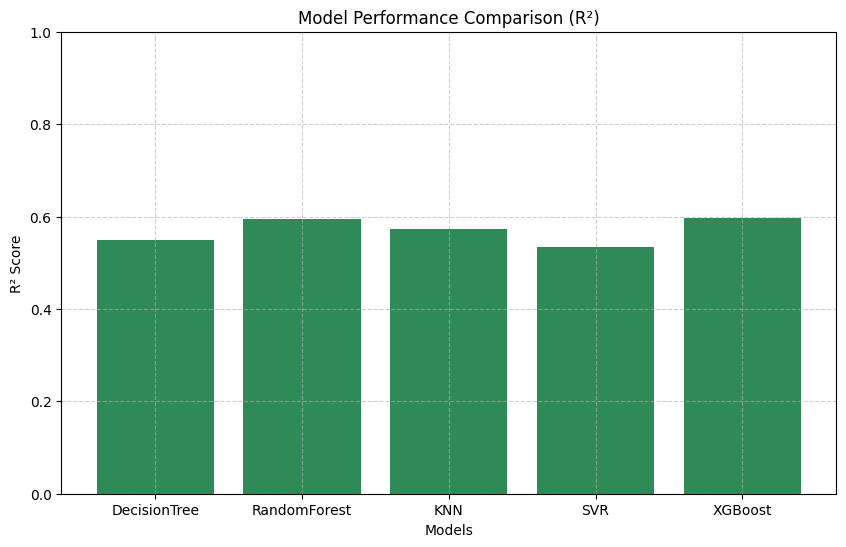


✅ Best Model (R²): XGBoost


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    impo...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [6, 8, 10], 'n_estimators': [500, 1000],
                         'subsample': [0.8, 1.0]},
             scoring='r2')

In [ ]:
# =====================================================
# Indian Crop Yield Prediction (2024–2025)
# =====================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# -----------------------------------------------------
# Load Dataset
# -----------------------------------------------------
data = pd.read_csv("yield_df_india_2024_2025.csv")

# Clean column names (adjust if different)
data.columns = data.columns.str.strip().str.lower()

# Rename if needed
rename_map = {
    "rainfall": "rainfall_2024_mm",
    "temperature": "temp_2024_c",
    "pesticides": "pesticide_2024_kg_ha",
    "yield": "yield_2024_t_ha"
}
data = data.rename(columns={k: v for k, v in rename_map.items() if k in data.columns})

# -----------------------------------------------------
# Clean Data (Handle missing or invalid values)
# -----------------------------------------------------
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(subset=["rainfall_2024_mm", "temp_2024_c", "pesticide_2024_kg_ha", "yield_2024_t_ha"])

# -----------------------------------------------------
# Features and Target
# -----------------------------------------------------
X = data[["rainfall_2024_mm", "temp_2024_c", "pesticide_2024_kg_ha"]]
y = data["yield_2024_t_ha"]

# Scale inputs
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# -----------------------------------------------------
# Define Models
# -----------------------------------------------------
models = {
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(random_state=42, n_jobs=-1)
}

# -----------------------------------------------------
# Parameter Grids
# -----------------------------------------------------
param_grids = {
    "DecisionTree": {"max_depth": [5, 10, 15, None], "min_samples_split": [2, 5, 10]},
    "RandomForest": {"n_estimators": [200, 500], "max_depth": [10, 20, None]},
    "KNN": {"n_neighbors": [3, 5, 7, 11], "weights": ["uniform", "distance"]},
    "SVR": {"kernel": ["rbf"], "C": [10, 50, 100], "epsilon": [0.01, 0.1]},
    "XGBoost": {
        "n_estimators": [500, 1000],
        "max_depth": [6, 8, 10],
        "learning_rate": [0.01, 0.05, 0.1],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0]
    }
}

# -----------------------------------------------------
# Train and Evaluate
# -----------------------------------------------------
results = {}
cv = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\nTraining {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=cv, scoring="r2", n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    y_pred = best_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}

# -----------------------------------------------------
# Display Results
# -----------------------------------------------------
df_results = pd.DataFrame(results).T
print("\n=== Yield Prediction Results ===")
print(df_results)

# -----------------------------------------------------
# Visualization
# -----------------------------------------------------
plt.figure(figsize=(10, 6))
plt.bar(df_results.index, df_results["R2"], color='seagreen')
plt.title("Model Performance Comparison (R²)")
plt.ylabel("R² Score")
plt.xlabel("Models")
plt.ylim(0, 1)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# -----------------------------------------------------
# Find and Retrain Best Model
# -----------------------------------------------------
best_model_name = df_results["R2"].idxmax()
print(f"\n✅ Best Model (R²): {best_model_name}")

# Retrain best model on full data
best_model_final = GridSearchCV(models[best_model_name], param_grids[best_model_name], cv=cv, scoring="r2", n_jobs=-1)
best_model_final.fit(X_scaled, y)

# Save or use this best_model_final.predict() for 2025 yield forecast


**CROP RECOMENDATION**

In [ ]:
# ======================================================
# CROP CLASSIFICATION USING INDIAN DATASET (2024–2025)
# ======================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# ==============================
# PART 1: Crop Classification
# ==============================
print("===== PART 1: Crop Classification =====")

# 1️⃣ Load the Indian crop dataset
df = pd.read_csv("/content/Indian_Crop_Recommendation.csv")  # <-- change path if needed

# 2️⃣ Display columns and record count
print("Dataset columns:", df.columns.tolist())
print("Number of records:", len(df))

# 3️⃣ Select features and label
X = df[["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]]
y = df["label"]

# 4️⃣ Normalize features and split data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# 5️⃣ Train Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# 6️⃣ Evaluate performance
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {acc*100:.2f}%")

# ==============================
# PART 2: User Input Prediction (Top 5 Crops)
# ==============================
print("\n===== PART 2: Top 5 Crop Recommendation =====")
print("Provide soil and weather parameters to predict recommended crops:")

# User inputs
N = float(input("Enter Nitrogen value (N): "))
P = float(input("Enter Phosphorus value (P): "))
K = float(input("Enter Potassium value (K): "))
temperature = float(input("Enter Temperature (°C): "))
humidity = float(input("Enter Humidity (%): "))
ph = float(input("Enter Soil pH: "))
rainfall = float(input("Enter Rainfall (mm): "))

# Prepare input for model
user_input = pd.DataFrame(
    [[N, P, K, temperature, humidity, ph, rainfall]],
    columns=["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]
)
user_input_scaled = scaler.transform(user_input)

# Predict probabilities for all crops
probs = model.predict_proba(user_input_scaled)[0]

# Get top 5 crops (best crop first)
top_indices = np.argsort(probs)[-5:][::-1]
top_crops = [model.classes_[i] for i in top_indices]

# Display top 5 crops
print("\n✅ Recommended Crops")
for i, crop in enumerate(top_crops, start=1):
    print(f"{i}. {crop}")


===== PART 1: Crop Classification =====
Dataset columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label', 'state']
Number of records: 5500

Model Accuracy: 97.94%

===== PART 2: Top 5 Crop Recommendation =====
Provide soil and weather parameters to predict recommended crops:
Enter Nitrogen value (N): 45
Enter Phosphorus value (P): 54
Enter Potassium value (K): 63
Enter Temperature (°C): 24
Enter Humidity (%): 70
Enter Soil pH: 7
Enter Rainfall (mm): 120

✅ Recommended Crops
1. groundnut
2. cotton
3. soybean
4. maize
5. coffee


**YIELD ESTIMATION**

In [ ]:
# ======================================================
# Wheat Yield Prediction (Indian Dataset 2024–2025)
# ======================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Enable experimental IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ---- Load Dataset ----
data = pd.read_csv("/content/yield_df_india_2024_2025.csv")

# Keep only relevant columns for 2024
data = data[["rainfall_2024_mm", "temp_2024_C", "pesticide_2024_kg_ha", "yield_2024_t_ha"]].dropna()

# Rename columns
data = data.rename(columns={
    "rainfall_2024_mm": "Rainfall",
    "temp_2024_C": "Temperature",
    "pesticide_2024_kg_ha": "Pesticides",
    "yield_2024_t_ha": "Yield"
})

# ---- Features & Target ----
X = data[["Rainfall", "Temperature", "Pesticides"]]
y = data["Yield"]

# ---- Imputation + Scaling ----
imputer = IterativeImputer(random_state=42)
X_imp = imputer.fit_transform(X)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imp)

# ---- Train/Test Split ----
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# ---- Model ----
try:
    from xgboost import XGBRegressor
    model = XGBRegressor(
        random_state=42, n_estimators=500,
        learning_rate=0.05, max_depth=4,
        subsample=0.9, colsample_bytree=0.9
    )
except Exception:
    model = RandomForestRegressor(random_state=42, n_estimators=600)

model.fit(X_train, y_train)

# ---- Evaluate ----
y_pred = model.predict(X_test)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")

# ---- Prediction Conversion Function ----
HA_TO_ACRES = 2.47105

def predict_yield(rainfall_mm, temperature_c, pesticides_kg_ha):
    sample = pd.DataFrame([[rainfall_mm, temperature_c, pesticides_kg_ha]],
                          columns=["Rainfall", "Temperature", "Pesticides"])
    sample_imp = imputer.transform(sample)
    sample_scaled = scaler.transform(sample_imp)
    y_hat_t_ha = model.predict(sample_scaled)[0]

    hg_per_ha = y_hat_t_ha * 10000  # 1 tonne = 10000 hectograms
    kg_per_ha = y_hat_t_ha * 1000
    tonnes_per_ha = y_hat_t_ha
    kg_per_acre = kg_per_ha / HA_TO_ACRES

    return {
        "hg_per_ha": hg_per_ha,
        "kg_per_ha": kg_per_ha,
        "kg_per_acre": kg_per_acre,
        "tonnes_per_ha": tonnes_per_ha
    }

# ---- User Input Example ----
print("\n=== Wheat Yield Prediction (inputs influence prediction) ===")
rain = float(input("Enter Rainfall (mm): "))
temp = float(input("Enter Temperature (°C): "))
pest = float(input("Enter Pesticide Usage (kg/ha): "))

pred = predict_yield(rain, temp, pest)

print("\n✅ Predicted Wheat Yield (based on provided inputs):")
print(f"- {pred['hg_per_ha']:.2f} Hg/Ha (dataset unit)")
print(f"- {pred['kg_per_ha']:.2f} kg/Ha")
print(f"- {pred['kg_per_acre']:.2f} kg/acre")
print(f"- {pred['tonnes_per_ha']:.4f} tonnes/Ha")

# ---- Farm Size Production ----
use_total = input("\nDo you want total production for a farm size? (y/n): ").strip().lower()
if use_total in ["y", "yes"]:
    acres = float(input("Enter farm size (acres): ").strip())
    hectares = acres / HA_TO_ACRES
    total_kg = pred["kg_per_ha"] * hectares
    total_tonnes = total_kg / 1000.0
    print(f"\nFor {acres:.2f} acres (~{hectares:.2f} ha):")
    print(f"- Total production ≈ {total_kg:.2f} kg")
    print(f"- Total production ≈ {total_tonnes:.2f} tonnes")
else:
    print("\nNo total production calculation requested. Done.")



Model Performance:
MAE  = 9.3146
RMSE = 15.4773
R²   = 0.5854

=== Wheat Yield Prediction (inputs influence prediction) ===
Enter Rainfall (mm): 30
Enter Temperature (°C): 20
Enter Pesticide Usage (kg/ha): 2

✅ Predicted Wheat Yield (based on provided inputs):
- 187357.78 Hg/Ha (dataset unit)
- 18735.78 kg/Ha
- 7582.11 kg/acre
- 18.7358 tonnes/Ha

Do you want total production for a farm size? (y/n): Y
Enter farm size (acres): 6

For 6.00 acres (~2.43 ha):
- Total production ≈ 45492.68 kg
- Total production ≈ 45.49 tonnes


**MULTI CROP RECOMENDATIONS**

In [ ]:
# ======================================================
# MULTI CROP RECOMMENDATION WITH YIELD ESTIMATION
# ======================================================

print("MULTI CROP RECOMMENDATION WITH YIELD ESTIMATION")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ======================================================
# PART 1: Crop Recommendation
# ======================================================

print("\n===== PART 1: Crop Recommendation =====")

# Load crop dataset
crop_df = pd.read_csv("/content/Indian_Crop_Recommendation.csv")

# Features and labels
X_crop = crop_df[["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]]
y_crop = crop_df["label"]

# Normalize and split
scaler_crop = MinMaxScaler()
X_scaled_crop = scaler_crop.fit_transform(X_crop)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_scaled_crop, y_crop, test_size=0.3, random_state=42
)

# Train model
crop_model = GaussianNB()
crop_model.fit(X_train_c, y_train_c)

# Accuracy
from sklearn.metrics import accuracy_score
y_pred_crop = crop_model.predict(X_test_c)
acc_crop = accuracy_score(y_test_c, y_pred_crop)

# User inputs
N = float(input("Enter Nitrogen (N): "))
P = float(input("Enter Phosphorus (P): "))
K = float(input("Enter Potassium (K): "))
temperature = float(input("Enter Temperature (°C): "))
humidity = float(input("Enter Humidity (%): "))
ph = float(input("Enter Soil pH: "))
rainfall = float(input("Enter Rainfall (mm): "))

# Prepare input
user_input_crop = pd.DataFrame(
    [[N, P, K, temperature, humidity, ph, rainfall]],
    columns=["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]
)
user_input_scaled_crop = scaler_crop.transform(user_input_crop)

# Predict top 5 crops
probs_crop = crop_model.predict_proba(user_input_scaled_crop)[0]
top_indices_crop = np.argsort(probs_crop)[-5:][::-1]
top_crops = [crop_model.classes_[i] for i in top_indices_crop]

print("\n✅ Recommended Crops:")
for i, crop in enumerate(top_crops, 1):
    print(f"{i}. {crop}")

choice = int(input("\nSelect a crop (1–5) for yield estimation: "))
selected_crop = top_crops[choice - 1]
print(f"\nYou selected: 🌱 {selected_crop}")

# ======================================================
# PART 2: Yield Estimation
# ======================================================
print("\n===== PART 2: Yield Estimation =====")

# Load yield dataset
yield_df = pd.read_csv("/content/yield_df_india_2024_2025.csv")

# Clean columns
yield_df = yield_df[
    ["rainfall_2025_mm", "temp_2025_C", "pesticide_2025_kg_ha", "yield_2025_t_ha"]
].dropna()
yield_df = yield_df.rename(
    columns={
        "rainfall_2025_mm": "Rainfall",
        "temp_2025_C": "Temperature",
        "pesticide_2025_kg_ha": "Pesticides",
        "yield_2025_t_ha": "Yield"
    }
)

# Prepare features
X_yield = yield_df[["Rainfall", "Temperature", "Pesticides"]]
y_yield = yield_df["Yield"]

# Imputation + Scaling
imputer = IterativeImputer(random_state=42)
X_imp = imputer.fit_transform(X_yield)
scaler_yield = MinMaxScaler()
X_scaled_yield = scaler_yield.fit_transform(X_imp)

# Split and model
X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(
    X_scaled_yield, y_yield, test_size=0.3, random_state=42
)

try:
    from xgboost import XGBRegressor
    yield_model = XGBRegressor(
        random_state=42, n_estimators=500,
        learning_rate=0.05, max_depth=4,
        subsample=0.9, colsample_bytree=0.9
    )
    model_name = "XGBRegressor"
except Exception:
    yield_model = RandomForestRegressor(random_state=42, n_estimators=600)
    model_name = "RandomForestRegressor"

yield_model.fit(X_train_y, y_train_y)

# Evaluation metrics
y_pred_y = yield_model.predict(X_test_y)
mae = mean_absolute_error(y_test_y, y_pred_y)
rmse = np.sqrt(mean_squared_error(y_test_y, y_pred_y))
r2 = r2_score(y_test_y, y_pred_y)

# Conversion constants
HA_TO_ACRES = 2.47105

def predict_yield(rainfall_mm, temperature_c, pesticides_kg_ha):
    sample = pd.DataFrame(
        [[rainfall_mm, temperature_c, pesticides_kg_ha]],
        columns=["Rainfall", "Temperature", "Pesticides"]
    )
    sample_imp = imputer.transform(sample)
    sample_scaled = scaler_yield.transform(sample_imp)
    y_hat_t_ha = yield_model.predict(sample_scaled)[0]
    return {
        "hg_per_ha": y_hat_t_ha * 10000,
        "kg_per_ha": y_hat_t_ha * 1000,
        "kg_per_acre": (y_hat_t_ha * 1000) / HA_TO_ACRES,
        "tonnes_per_ha": y_hat_t_ha
    }

# ✅ Use rainfall & temperature from classification part
print(f"\n🌾 Yield Estimation for {selected_crop}")
pest_y = float(input("Enter Pesticide usage (kg/ha): "))

pred_yield = predict_yield(rainfall, temperature, pest_y)

print("\n✅ Predicted Yield:")
print(f"- {pred_yield['hg_per_ha']:.2f} Hg/Ha")
print(f"- {pred_yield['kg_per_ha']:.2f} kg/Ha")
print(f"- {pred_yield['kg_per_acre']:.2f} kg/acre")
print(f"- {pred_yield['tonnes_per_ha']:.4f} tonnes/Ha")

# Optional total production
use_total = input("\nDo you want total production for your farm size? (y/n): ").strip().lower()
if use_total in ["y", "yes"]:
    acres = float(input("Enter farm size (acres): ").strip())
    hectares = acres / HA_TO_ACRES
    total_kg = pred_yield["kg_per_ha"] * hectares
    total_tonnes = total_kg / 1000.0
    print(f"\nFor {acres:.2f} acres (~{hectares:.2f} ha):")
    print(f"- Total production ≈ {total_kg:.2f} kg")
    print(f"- Total production ≈ {total_tonnes:.2f} tonnes")
else:
    print("\n✅ Process completed successfully.")


MULTI CROP RECOMMENDATION WITH YIELD ESTIMATION

===== PART 1: Crop Recommendation =====
Enter Nitrogen (N): 85
Enter Phosphorus (P): 40
Enter Potassium (K): 45
Enter Temperature (°C): 29
Enter Humidity (%): 78
Enter Soil pH: 6.4
Enter Rainfall (mm): 140

✅ Recommended Crops:
1. rice
2. maize
3. coffee
4. soybean
5. wheat

Select a crop (1–5) for yield estimation: 1

You selected: 🌱 rice

===== PART 2: Yield Estimation =====

🌾 Yield Estimation for rice
Enter Pesticide usage (kg/ha): 1.5

✅ Predicted Yield:
- 58247.33 Hg/Ha
- 5824.73 kg/Ha
- 2357.19 kg/acre
- 5.8247 tonnes/Ha

Do you want total production for your farm size? (y/n): y
Enter farm size (acres): 4

For 4.00 acres (~1.62 ha):
- Total production ≈ 9428.76 kg
- Total production ≈ 9.43 tonnes


**MARKET PRICE PREDICTION**

In [ ]:
# ======================================================
# MULTI CROP RECOMMENDATION WITH YIELD ESTIMATION + USER-INPUT MARKET PRICE
# ======================================================

print("MULTI CROP RECOMMENDATION WITH YIELD ESTIMATION + USER-INPUT MARKET PRICE")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ======================================================
# PART 1: Crop Recommendation
# ======================================================

print("\n===== PART 1: Crop Recommendation =====")

# Load crop dataset
crop_df = pd.read_csv("/content/Indian_Crop_Recommendation.csv")

X_crop = crop_df[["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]]
y_crop = crop_df["label"]

# Normalize and split
scaler_crop = MinMaxScaler()
X_scaled_crop = scaler_crop.fit_transform(X_crop)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_scaled_crop, y_crop, test_size=0.3, random_state=42
)

# Train Gaussian Naive Bayes model
crop_model = GaussianNB()
crop_model.fit(X_train_c, y_train_c)

from sklearn.metrics import accuracy_score
y_pred_crop = crop_model.predict(X_test_c)
acc_crop = accuracy_score(y_test_c, y_pred_crop)

# -----------------------------
# User inputs for soil & weather
# -----------------------------
print("\nProvide soil & weather parameters:\n")
N = float(input("Enter Nitrogen (N): "))
P = float(input("Enter Phosphorus (P): "))
K = float(input("Enter Potassium (K): "))
temperature = float(input("Enter Temperature (°C): "))
humidity = float(input("Enter Humidity (%): "))
ph = float(input("Enter Soil pH: "))
rainfall = float(input("Enter Rainfall (mm): "))

user_input_crop = pd.DataFrame(
    [[N, P, K, temperature, humidity, ph, rainfall]],
    columns=["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]
)
user_input_scaled_crop = scaler_crop.transform(user_input_crop)

probs_crop = crop_model.predict_proba(user_input_scaled_crop)[0]
top_indices_crop = np.argsort(probs_crop)[-5:][::-1]
top_crops = [crop_model.classes_[i] for i in top_indices_crop]

print("\nRecommended Crops:")
for i, crop in enumerate(top_crops, 1):
    print(f"{i}. {crop}")

choice = int(input("\nSelect a crop (1–5) for yield estimation: "))
selected_crop = top_crops[choice - 1]
print(f"\nYou selected:  {selected_crop}")

# ======================================================
# PART 2: Yield Estimation
# ======================================================

print("\n===== PART 2: Yield Estimation =====")

# Load yield dataset
yield_df = pd.read_csv("/content/yield_df_india_2024_2025.csv")

# Prepare yield columns
yield_df = yield_df[
    ["rainfall_2025_mm", "temp_2025_C", "pesticide_2025_kg_ha", "yield_2025_t_ha"]
].dropna()
yield_df = yield_df.rename(
    columns={
        "rainfall_2025_mm": "Rainfall",
        "temp_2025_C": "Temperature",
        "pesticide_2025_kg_ha": "Pesticides",
        "yield_2025_t_ha": "Yield"
    }
)

X_yield = yield_df[["Rainfall", "Temperature", "Pesticides"]]
y_yield = yield_df["Yield"]

# Imputer + scaling
imputer = IterativeImputer(random_state=42)
X_imp = imputer.fit_transform(X_yield)
scaler_yield = MinMaxScaler()
X_scaled_yield = scaler_yield.fit_transform(X_imp)

# Split and train model
X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(
    X_scaled_yield, y_yield, test_size=0.3, random_state=42
)

try:
    from xgboost import XGBRegressor
    yield_model = XGBRegressor(
        random_state=42, n_estimators=500,
        learning_rate=0.05, max_depth=4,
        subsample=0.9, colsample_bytree=0.9
    )
    model_name = "XGBRegressor"
except Exception:
    yield_model = RandomForestRegressor(random_state=42, n_estimators=600)
    model_name = "RandomForestRegressor"

yield_model.fit(X_train_y, y_train_y)

y_pred_y = yield_model.predict(X_test_y)
mae = mean_absolute_error(y_test_y, y_pred_y)
rmse = np.sqrt(mean_squared_error(y_test_y, y_pred_y))
r2 = r2_score(y_test_y, y_pred_y)

# -----------------------------
# Yield prediction function
# -----------------------------
HA_TO_ACRES = 2.47105

def predict_yield(rainfall_mm, temperature_c, pesticides_kg_ha):
    sample = pd.DataFrame([[rainfall_mm, temperature_c, pesticides_kg_ha]],
                          columns=["Rainfall", "Temperature", "Pesticides"])
    sample_imp = imputer.transform(sample)
    sample_scaled = scaler_yield.transform(sample_imp)
    y_hat = yield_model.predict(sample_scaled)[0]
    return {
        "hg_per_ha": y_hat * 10000,
        "kg_per_ha": y_hat * 1000,
        "kg_per_acre": (y_hat * 1000) / HA_TO_ACRES,
        "tonnes_per_ha": y_hat
    }

print(f"\n Yield Estimation for {selected_crop}")
# Only ask pesticide usage
pest_y = float(input("Enter Pesticide usage (kg/ha): "))

pred = predict_yield(rainfall, temperature, pest_y)

print("\nPredicted Yield:")
print(f"- {pred['hg_per_ha']:.2f} Hg/Ha")
print(f"- {pred['kg_per_ha']:.2f} kg/Ha")
print(f"- {pred['kg_per_acre']:.2f} kg/acre")
print(f"- {pred['tonnes_per_ha']:.4f} tonnes/Ha")

# -----------------------------
# Total production & profit/loss
# -----------------------------
use_total = input("\nDo you want total production for your farm size? (y/n): ").strip().lower()
if use_total in ["y", "yes"]:
    acres = float(input("Enter farm size (acres): ").strip())
    hectares = acres / HA_TO_ACRES
    total_kg = pred["kg_per_ha"] * hectares
    total_tonnes = total_kg / 1000.0
    print(f"\nFor {acres:.2f} acres (~{hectares:.2f} ha):")
    print(f"- Total production ≈ {total_kg:.2f} kg")
    print(f"- Total production ≈ {total_tonnes:.2f} tonnes")

    # -----------------------------
    # Ask user for current market price
    # -----------------------------
    price_per_kg = float(input(f"Enter current market price (₹/kg) for {selected_crop}: "))
    total_income = total_kg * price_per_kg
    print(f"\nMarket Price for {selected_crop}: ₹{price_per_kg:.2f} per kg")
    print(f" Estimated Gross Income: ₹{total_income:,.2f}")

    # -----------------------------
    # Ask cultivation cost
    # -----------------------------
    use_cost = input("\nDo you want to enter cultivation cost per acre? (y/n): ").strip().lower()
    if use_cost in ["y", "yes"]:
        cost_per_acre = float(input("Enter average cultivation cost per acre (₹): "))
        total_cost = cost_per_acre * acres
        profit = total_income - total_cost
        print(f"\nTotal Cultivation Cost: ₹{total_cost:,.2f}")
        print(f" Net Profit: ₹{profit:,.2f}")
        if profit > 0:
            print("Profit: You are likely to gain profit this season!")
        else:
            print("Loss: You may incur a loss this season.")
    else:
        print("Skipped cost entry. Only gross income shown.")

else:
    print("\n Process completed without total production / revenue section.")


MULTI CROP RECOMMENDATION WITH YIELD ESTIMATION + USER-INPUT MARKET PRICE

===== PART 1: Crop Recommendation =====

Provide soil & weather parameters:

Enter Nitrogen (N): 85
Enter Phosphorus (P): 40
Enter Potassium (K): 45
Enter Temperature (°C): 29
Enter Humidity (%): 78
Enter Soil pH: 6.4
Enter Rainfall (mm): 140

Recommended Crops:
1. rice
2. maize
3. coffee
4. soybean
5. wheat

Select a crop (1–5) for yield estimation: 1

You selected:  rice

===== PART 2: Yield Estimation =====

 Yield Estimation for rice
Enter Pesticide usage (kg/ha): 1.5

Predicted Yield:
- 58247.33 Hg/Ha
- 5824.73 kg/Ha
- 2357.19 kg/acre
- 5.8247 tonnes/Ha

Do you want total production for your farm size? (y/n): y
Enter farm size (acres): 4

For 4.00 acres (~1.62 ha):
- Total production ≈ 9428.76 kg
- Total production ≈ 9.43 tonnes
Enter current market price (₹/kg) for rice: 32

Market Price for rice: ₹32.00 per kg
 Estimated Gross Income: ₹301,720.28

Do you want to enter cultivation cost per acre? (y/n): y
E